# San Francisco Airport Clustering

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/San_Francisco_International_Airport_-_aerial_photo.jpg/1200px-San_Francisco_International_Airport_-_aerial_photo.jpg" />

### Clustering Application Project on Monthly Statistics Provided by San Francisco Open Data and Airlines at San Francisco International Airport.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

##Exploratory Data Analysis

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.shape

(18885, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [7]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [8]:
df['Operating Airline'].value_counts()

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 89, dtype: int64

In [9]:
df['Terminal'].value_counts()

Terminal
International    11963
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               27
Name: count, dtype: int64

In [10]:
df['GEO Region'].value_counts()

GEO Region
US                     6981
Asia                   4073
Europe                 2803
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         383
Middle East             354
South America            91
Name: count, dtype: int64

In [11]:
df['Price Category Code'].value_counts()

Price Category Code
Other       16521
Low Fare     2364
Name: count, dtype: int64

In [12]:
x=df[['Operating Airline','GEO Region','Activity Type Code','Terminal','Passenger Count','Price Category Code','Boarding Area','GEO Summary']]

In [13]:
x.head()

,Operating Airline,GEO Region,Activity Type Code,Terminal,Passenger Count,Price Category Code,Boarding Area,GEO Summary
0,ATA Airlines,US,Deplaned,Terminal 1,27271,Low Fare,B,Domestic
1,ATA Airlines,US,Enplaned,Terminal 1,29131,Low Fare,B,Domestic
2,ATA Airlines,US,Thru / Transit,Terminal 1,5415,Low Fare,B,Domestic
3,Air Canada,Canada,Deplaned,Terminal 1,35156,Other,B,International
4,Air Canada,Canada,Enplaned,Terminal 1,34090,Other,B,International


In [14]:
x=pd.get_dummies(x,drop_first=True)

## Model

In [15]:
model=KMeans(4)

In [16]:
model=model.fit(x)

In [17]:
tahmin=model.predict(x)

In [18]:
tahmin

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
x['cluster']=tahmin

In [20]:
x

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Price Category Code_Other,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,GEO Summary_International,cluster
0,27271,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,0
1,29131,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,0
2,5415,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,0
3,35156,False,False,False,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,True,2
4,34090,False,False,False,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,0
18881,10868,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,0
18882,11664,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,0
18883,804,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,0


In [21]:
x['cluster'].value_counts()

cluster
0    15357
2     2001
3     1136
1      391
Name: count, dtype: int64

In [22]:
silhouette_score(x,tahmin)

0.7863340675190175

In [23]:
df['cluster']=tahmin

In [24]:
import matplotlib.pyplot as plt

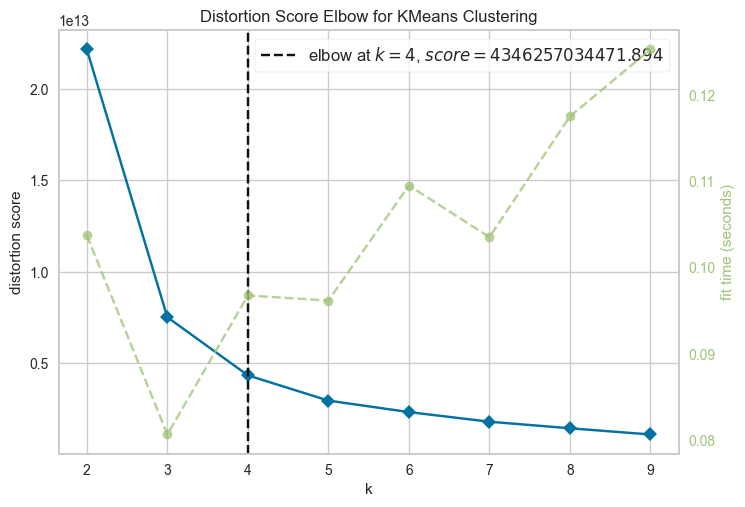

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

## Result Visualization

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage
data=linkage(x,method='ward',metric='euclidean')

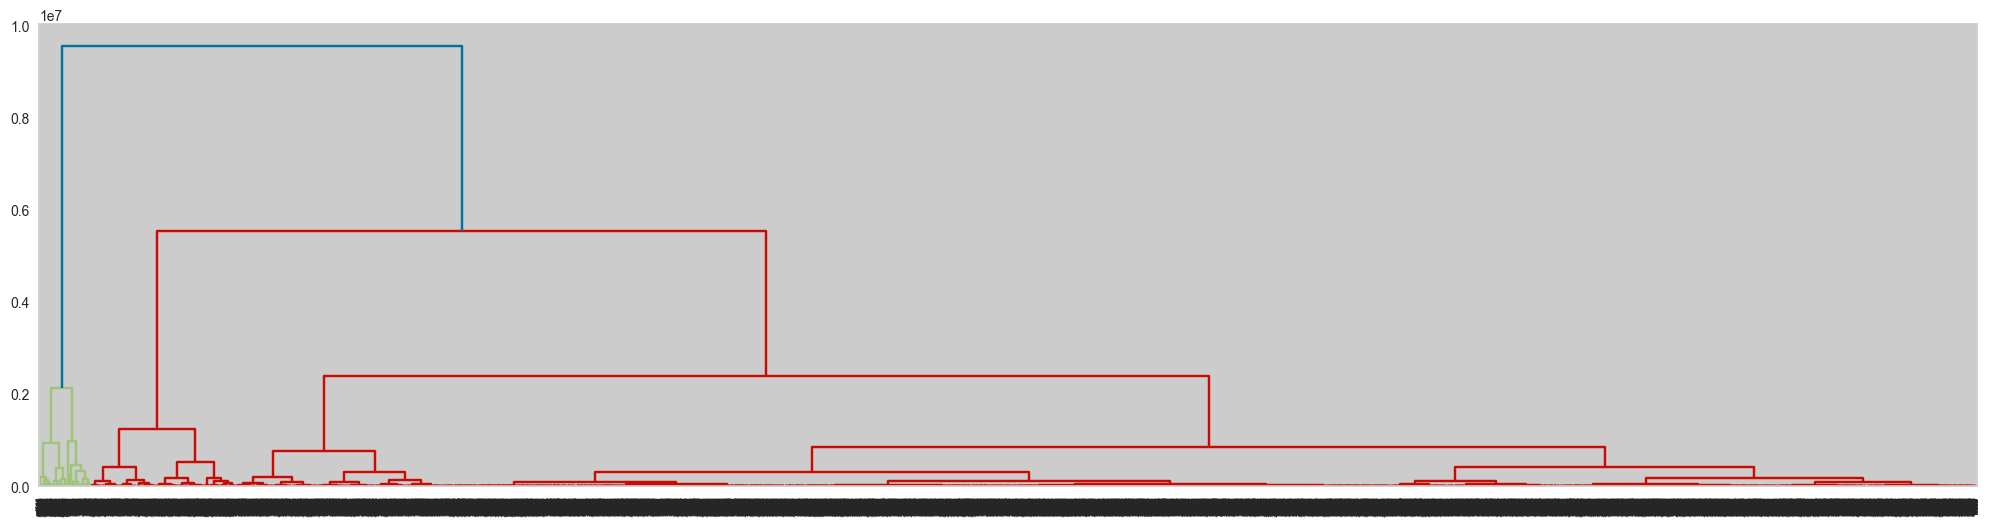

In [27]:
plt.figure(figsize=(25,6))
dendrogram(data);

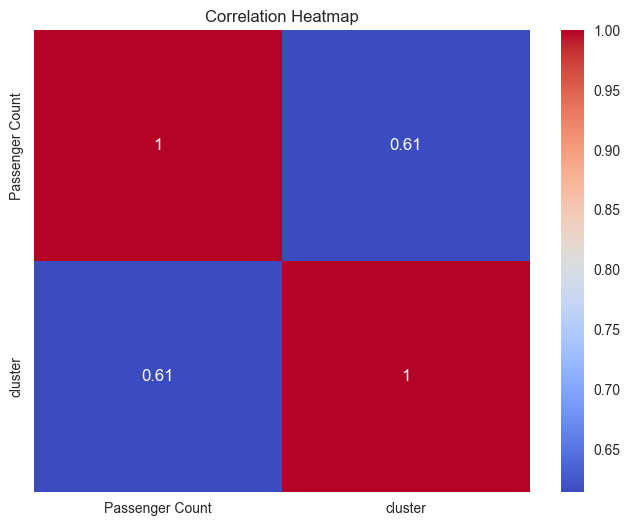

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi
correlation_matrix = df[['Passenger Count', 'cluster']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
 12  cluster                      18885 non-null  int32 
dtypes: int32(1), int64(2), object(1

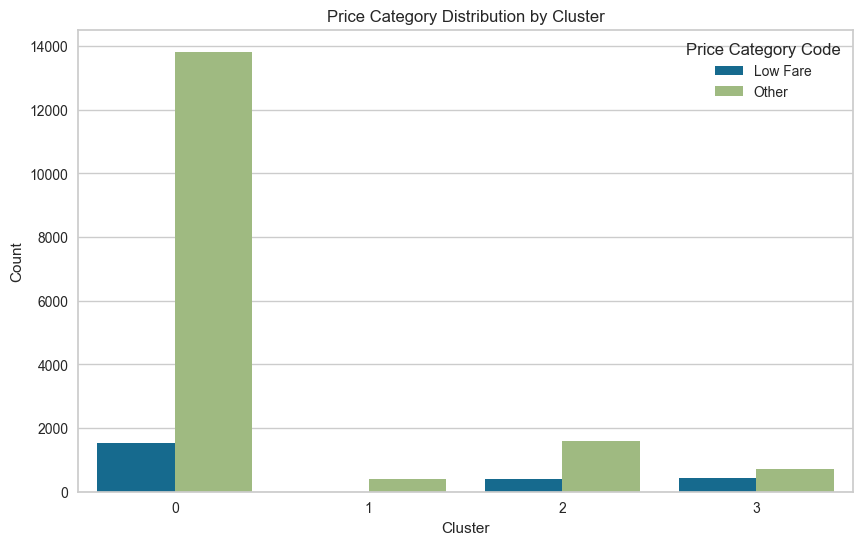

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster', hue='Price Category Code')
plt.title('Price Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


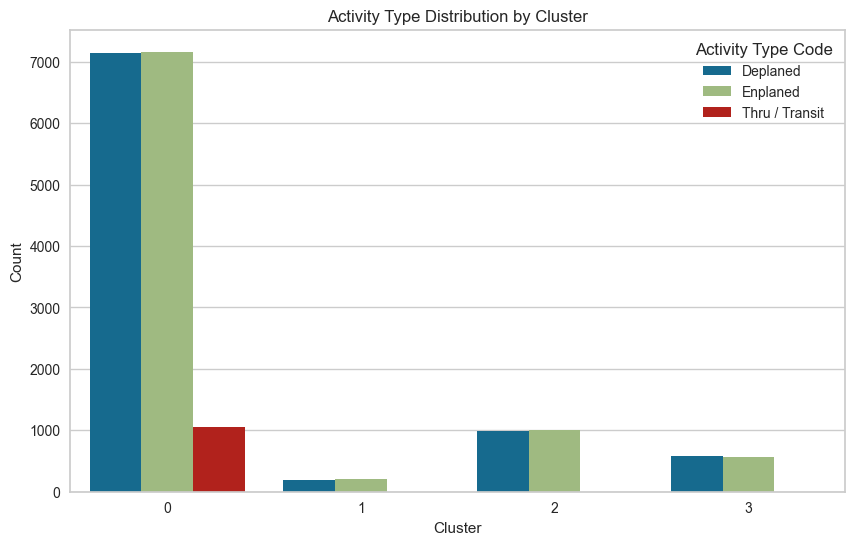

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster', hue='Activity Type Code')
plt.title('Activity Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


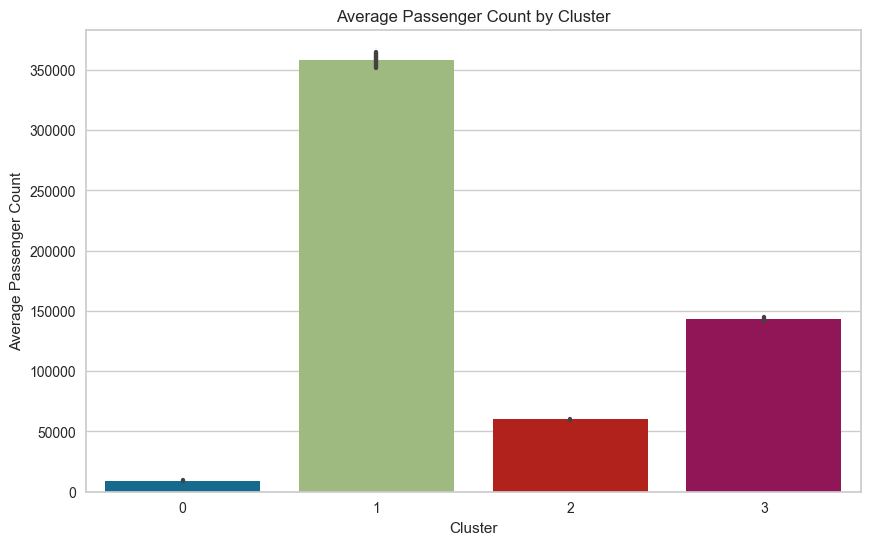

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cluster', y='Passenger Count', estimator='mean')
plt.title('Average Passenger Count by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Passenger Count')
plt.show()


### After applying machine learning, four distinct clusters were formed, and this cluster count was supported using the Elbow Method. The Silhouette Score was 0.78. The differences between the clusters were illustrated with graphs.